In [4]:
import pandas as pd

df = pd.read_csv('people.csv', header=None)  
df

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,1,3,2,3,1,2,3,3,33,49,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,3,3,2,3,3,26,39,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,2,3,2,1,3,52,53,...,0,0,0,0,0,0,0,0,0,0
3,4,3,2,3,2,2,2,3,8,13,...,0,0,0,0,0,0,0,0,0,0
4,5,3,1,1,1,2,3,3,6,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,1,1,1,2,2,3,2,17,32,...,0,0,0,0,0,0,0,0,0,0
3996,3997,1,1,2,1,2,3,3,3,31,...,0,0,0,0,0,0,0,0,0,0
3997,3998,2,2,3,1,1,2,2,13,37,...,0,0,0,0,0,0,0,0,0,0
3998,3999,1,1,3,3,3,3,3,12,29,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_cols = ['ID', 'party', 'vote', 
             'hobby_music', 'hobby_car', 'hobby_sports', 'hobby_movie', 'hobby_food']
num_friend = df.shape[1] - len(data_cols)
friend_cols = [f'friend_{i+1}' for i in range(num_friend)]

df.columns = data_cols + friend_cols
df.head()[['ID','party','vote','hobby_music','hobby_car','hobby_sports','hobby_movie','hobby_food']]

,ID,party,vote,hobby_music,hobby_car,hobby_sports,hobby_movie,hobby_food
0,1,3,2,3,1,2,3,3
1,2,3,2,3,3,2,3,3
2,3,1,1,2,3,2,1,3
3,4,3,2,3,2,2,2,3
4,5,3,1,1,1,2,3,3


In [8]:
# influence graph
# 1. friend
# 2. share >=3 hobbies

adjacency = {}

# dictionary of hobbies
hobbies = {int(row.ID): [row.hobby_music, row.hobby_car, row.hobby_sports, row.hobby_movie, row.hobby_food] 
           for row in df.itertuples(index=False)}

for row in df.itertuples(index=False):
    voter = int(row.ID)
    
    friends = [int(f) for f in row[8:] if not (pd.isna(f) or f == '')] 
    for friend in friends: # 1. friend
        if friend <= 0 or friend not in hobbies:
            continue
        common_hobbies = sum(1 for i in range(5) if hobbies[voter][i] == hobbies[friend][i])
        if common_hobbies >= 3:# 2. share >=3 hobbies
            if voter not in adjacency:
                adjacency[voter] = set()
            if friend not in adjacency:
                adjacency[friend] = set()
            adjacency[voter].add(friend)
            adjacency[friend].add(voter)

for pid in list(adjacency.keys())[:5]:
    print(f"Voter {pid} is connected to: {sorted(adjacency[pid])}")

Voter 1 is connected to: [33, 49, 79, 172, 190, 191, 259, 298, 310, 334, 338, 383, 430, 447, 513, 539, 597, 629, 644, 698, 729, 801, 815, 826, 830, 836, 846, 856, 876, 907, 911, 947, 953, 1024, 1066, 1084, 1153, 1154, 1174, 1268, 1284, 1310, 1478, 1492, 1536, 1539, 1540, 1581, 1596, 1637, 1644, 1667, 1683, 1714, 1755, 1760, 1762, 1781, 1790, 1806, 1821, 1829, 1833, 1834, 1859, 1888, 1898, 1905, 1906, 1913, 1926, 1951, 2052, 2115, 2153, 2162, 2178, 2269, 2349, 2367, 2374, 2383, 2400, 2414, 2442, 2467, 2478, 2499, 2554, 2585, 2632, 2648, 2705, 2709, 2727, 2759, 2858, 2863, 2893, 2904, 2910, 2932, 2939, 2955, 2956, 3029, 3060, 3070, 3084, 3091, 3158, 3228, 3254, 3361, 3388, 3493, 3522, 3527, 3534, 3580, 3610, 3621, 3630, 3659, 3673, 3683, 3700, 3716, 3759, 3767, 3775, 3869, 3887, 3888, 3964, 3972, 3983]
Voter 33 is connected to: [1, 39, 88, 92, 120, 152, 189, 205, 276, 337, 349, 376, 399, 419, 421, 443, 475, 485, 487, 585, 657, 680, 686, 695, 702, 707, 708, 723, 799, 831, 835, 846, 911, 9

In [10]:
# 2. which candidate will win the race on the first day i.e. before any changes.
vote_ini_A = (df['vote'] == 1).sum()
vote_ini_B = (df['vote'] == 2).sum()
vote_ini_neutral = (df['vote'] == 3).sum()

print("Party-A supporters (initial):", vote_ini_A)
print("Party-B supporters (initial):", vote_ini_B)
print("Neutral (not voting initially):", vote_ini_neutral)

if vote_ini_A > vote_ini_B:
    print("Party-A is initially leading.")
elif vote_ini_B > vote_ini_A:
    print("Party-B is initially leading.")
else:
    print("Neither party is leading initially (it's a tie).")

Party-A supporters (initial): 1686
Party-B supporters (initial): 1681
Neutral (not voting initially): 633
Party-A is initially leading.


In [12]:
current_votes = {int(row.ID): int(row.vote) for row in df.itertuples(index=False)}

day = 0
history = []

# Explicitly record initial votes before changes (Day 0)
count_A = sum(v == 1 for v in current_votes.values())
count_B = sum(v == 2 for v in current_votes.values())
count_N = sum(v == 3 for v in current_votes.values())
history.append((day, count_A, count_B, count_N))

while True:
    changes_today = 0  
    new_votes = current_votes.copy()

    # neutral --> cont party A & B friend
    for voter, decision in current_votes.items():
        if decision == 3:  
            friends = adjacency.get(voter, [])
            
            votes_a = sum(1 for friend in friends if current_votes[friend] == 1)
            votes_b = sum(1 for friend in friends if current_votes[friend] == 2)
            
            if votes_a > votes_b:
                new_votes[voter] = 1
                changes_today += 1
            elif votes_b > votes_a:
                new_votes[voter] = 2
                changes_today += 1
    
    current_votes = new_votes
    day += 1  
    count_A = sum(v == 1 for v in current_votes.values())
    count_B = sum(v == 2 for v in current_votes.values())
    count_N = sum(v == 3 for v in current_votes.values())
    history.append((day, count_A, count_B, count_N))

    # Now check stabilization clearly after recording
    if changes_today == 0:
        print(f"Voting stabilized after {day-1} days.")
        break 

# After stabilization, final results:
final_A = count_A
final_B = count_B
final_N = count_N

print(f"Final counts after stabilization: Party-A = {final_A}, Party-B = {final_B}, Neutral = {final_N}")

# Determine clearly which party wins
if final_A > final_B:
    print("Party-A wins after stabilization.")
elif final_B > final_A:
    print("Party-B wins after stabilization.")
else:
    print("Election ended in a tie after stabilization.")

Voting stabilized after 3 days.
Final counts after stabilization: Party-A = 2010, Party-B = 1986, Neutral = 4
Party-A wins after stabilization.


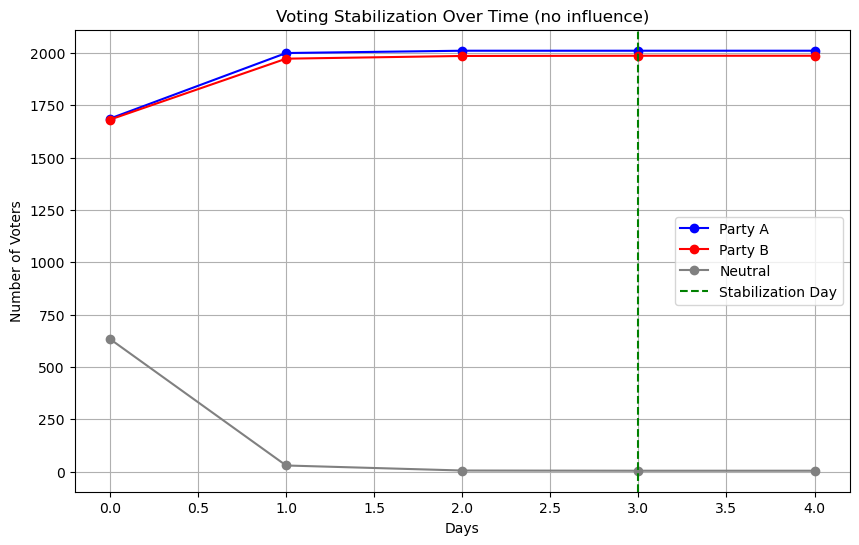

In [14]:

days, votes_A, votes_B, votes_neutral = zip(*history)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(days, votes_A, marker='o', label='Party A', color='blue')
plt.plot(days, votes_B, marker='o', label='Party B', color='red')
plt.plot(days, votes_neutral, marker='o', label='Neutral', color='grey')

plt.axvline(x=days[-2], color='green', linestyle='--', linewidth=1.5, label='Stabilization Day')

plt.xlabel('Days')
plt.ylabel('Number of Voters')
plt.title('Voting Stabilization Over Time (no influence)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
history

[(0, 1686, 1681, 633),
 (1, 1999, 1972, 29),
 (2, 2010, 1985, 5),
 (3, 2010, 1986, 4),
 (4, 2010, 1986, 4)]

In [16]:
# Scenario: Two influencers who cannot vote
votes_after_influencers = {int(row.ID): int(row.vote) for row in df.itertuples(index=False)}

for row in df.itertuples(index=False):
    voter_id = int(row.ID)
    
    # type-1 music (not type-1 car) → Party-A
    if row.hobby_music == 1 and row.hobby_car != 1:
        votes_after_influencers[voter_id] = 1  
        
    # type-1 car (not type-1 music) → Party-B
    elif row.hobby_car == 1 and row.hobby_music != 1:
        votes_after_influencers[voter_id] = 2  

day = 0
history_influencers = []

count_A = sum(v == 1 for v in votes_after_influencers.values())
count_B = sum(v == 2 for v in votes_after_influencers.values())
count_N = sum(v == 3 for v in votes_after_influencers.values())
history_influencers.append((day, count_A, count_B, count_N))

while True:
    changes_today = 0
    new_votes = votes_after_influencers.copy()

    for voter, decision in votes_after_influencers.items():
        if decision == 3: 
            friends = adjacency.get(voter, [])
            votes_a = sum(1 for friend in friends if votes_after_influencers[friend] == 1)
            votes_b = sum(1 for friend in friends if votes_after_influencers[friend] == 2)
            
            if votes_a > votes_b:
                new_votes[voter] = 1 
                changes_today += 1
            elif votes_b > votes_a:
                new_votes[voter] = 2 
                changes_today += 1

    votes_after_influencers = new_votes
    day += 1  

    count_A = sum(v == 1 for v in votes_after_influencers.values())
    count_B = sum(v == 2 for v in votes_after_influencers.values())
    count_N = sum(v == 3 for v in votes_after_influencers.values())
    history_influencers.append((day, count_A, count_B, count_N))

    if changes_today == 0:
        day += 1
        history_influencers.append((day, count_A, count_B, count_N))
        print(f"Voting stabilized after influencers in {day - 1} days.")
        break  

# Final results
final_A = count_A
final_B = count_B
final_N = count_N

print("\nFinal votes after influencers stabilization:")
print(f"Party-A: {final_A}")
print(f"Party-B: {final_B}")
print(f"Neutral voters remaining: {final_N}")

if final_A > final_B:
    print("Winner after 2influencers: Party-A ")
elif final_B > final_A:
    print("Winner after 2influencers: Party-B ")
else:
    print("Election after 2influencers ended in a tie.")

Voting stabilized after influencers in 3 days.

Final votes after influencers stabilization:
Party-A: 1970
Party-B: 2029
Neutral voters remaining: 1
Winner after 2influencers: Party-B 


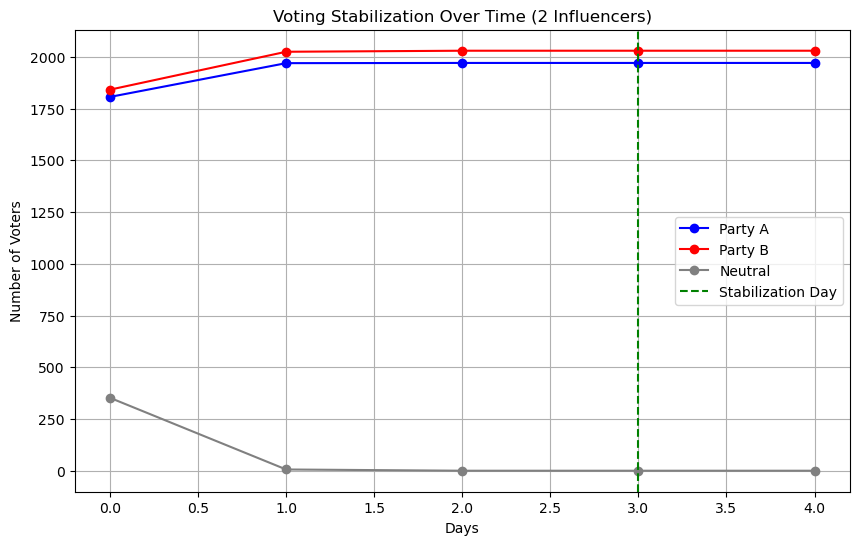

In [18]:

days, votes_A, votes_B, votes_neutral = zip(*history_influencers)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(days, votes_A, marker='o', label='Party A', color='blue')
plt.plot(days, votes_B, marker='o', label='Party B', color='red')
plt.plot(days, votes_neutral, marker='o', label='Neutral', color='grey')

plt.axvline(x=days[-2], color='green', linestyle='--', linewidth=1.5, label='Stabilization Day')

plt.xlabel('Days')
plt.ylabel('Number of Voters')
plt.title('Voting Stabilization Over Time (2 Influencers)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
history

[(0, 1686, 1681, 633),
 (1, 1999, 1972, 29),
 (2, 2010, 1985, 5),
 (3, 2010, 1986, 4),
 (4, 2010, 1986, 4)]

In [20]:
hobby_names = ['hobby_music', 'hobby_car', 'hobby_sports', 'hobby_movie', 'hobby_food']
hobby_types = [1, 2, 3]

best_result = {
    'hobby': None,
    'type': None,
    'votes_for_A': -1,
    'votes_for_B': -1,
    'neutral': -1,
    'days': -1
}
best_history = []

for hobby in hobby_names:
    for htype in hobby_types:
        votes_with_influencer = {int(row.ID): int(row.vote) for row in df.itertuples(index=False)}
        
        # `htype` to Party-A
        for row in df.itertuples(index=False):
            voter_id = int(row.ID)
            if getattr(row, hobby) == htype:
                votes_with_influencer[voter_id] = 1
        
        # Stabilization 
        day = 0
        history = []
        
        # Record Day 0 vote counts
        count_A = sum(v == 1 for v in votes_with_influencer.values())
        count_B = sum(v == 2 for v in votes_with_influencer.values())
        count_N = sum(v == 3 for v in votes_with_influencer.values())
        history.append((day, count_A, count_B, count_N))
        
        while True:
            changes_today = 0
            new_votes = votes_with_influencer.copy()

            for voter, decision in votes_with_influencer.items():
                if decision == 3:
                    friends = adjacency.get(voter, [])
                    votes_a = sum(1 for friend in friends if votes_with_influencer[friend] == 1)
                    votes_b = sum(1 for friend in friends if votes_with_influencer[friend] == 2)

                    if votes_a > votes_b:
                        new_votes[voter] = 1
                        changes_today += 1
                    elif votes_b > votes_a:
                        new_votes[voter] = 2
                        changes_today += 1

            votes_with_influencer = new_votes
            day += 1

            count_A = sum(v == 1 for v in votes_with_influencer.values())
            count_B = sum(v == 2 for v in votes_with_influencer.values())
            count_N = sum(v == 3 for v in votes_with_influencer.values())
            history.append((day, count_A, count_B, count_N))

            if changes_today == 0:
                break

        print(f"Hobby: {hobby}, Type: {htype}")
        print(f"  Stabilized after {day-1} days.")
        print(f"  Party-A: {count_A}, Party-B: {count_B}, Neutral: {count_N}\n")

        if count_A > best_result['votes_for_A']:
            best_result = {
                'hobby': hobby,
                'type': htype,
                'votes_for_A': count_A,
                'votes_for_B': count_B,
                'neutral': count_N,
                'days': day-1
            }
            best_history = history

print("\nOptimal Hobby-Type Influencer for Party-A:")
print(f"  Hobby: {best_result['hobby']}")
print(f"  Type: {best_result['type']}")
print(f"  Final Votes → Party-A: {best_result['votes_for_A']}, Party-B: {best_result['votes_for_B']}, Neutral: {best_result['neutral']}")
print(f"  Stabilized in {best_result['days']} days.")

# Winner
if best_result['votes_for_A'] > best_result['votes_for_B']:
    print("  Winner: Party-A ")
elif best_result['votes_for_B'] > best_result['votes_for_A']:
    print("  Winner: Party-B")
else:
    print("  It's a tie.")

Hobby: hobby_music, Type: 1
  Stabilized after 2 days.
  Party-A: 2868, Party-B: 1132, Neutral: 0

Hobby: hobby_music, Type: 2
  Stabilized after 2 days.
  Party-A: 2869, Party-B: 1130, Neutral: 1

Hobby: hobby_music, Type: 3
  Stabilized after 2 days.
  Party-A: 2865, Party-B: 1135, Neutral: 0

Hobby: hobby_car, Type: 1
  Stabilized after 2 days.
  Party-A: 2875, Party-B: 1125, Neutral: 0

Hobby: hobby_car, Type: 2
  Stabilized after 2 days.
  Party-A: 2866, Party-B: 1134, Neutral: 0

Hobby: hobby_car, Type: 3
  Stabilized after 1 days.
  Party-A: 2858, Party-B: 1142, Neutral: 0

Hobby: hobby_sports, Type: 1
  Stabilized after 2 days.
  Party-A: 2353, Party-B: 1647, Neutral: 0

Hobby: hobby_sports, Type: 2
  Stabilized after 1 days.
  Party-A: 3649, Party-B: 351, Neutral: 0

Hobby: hobby_sports, Type: 3
  Stabilized after 2 days.
  Party-A: 2346, Party-B: 1654, Neutral: 0

Hobby: hobby_movie, Type: 1
  Stabilized after 2 days.
  Party-A: 2339, Party-B: 1660, Neutral: 1

Hobby: hobby_m

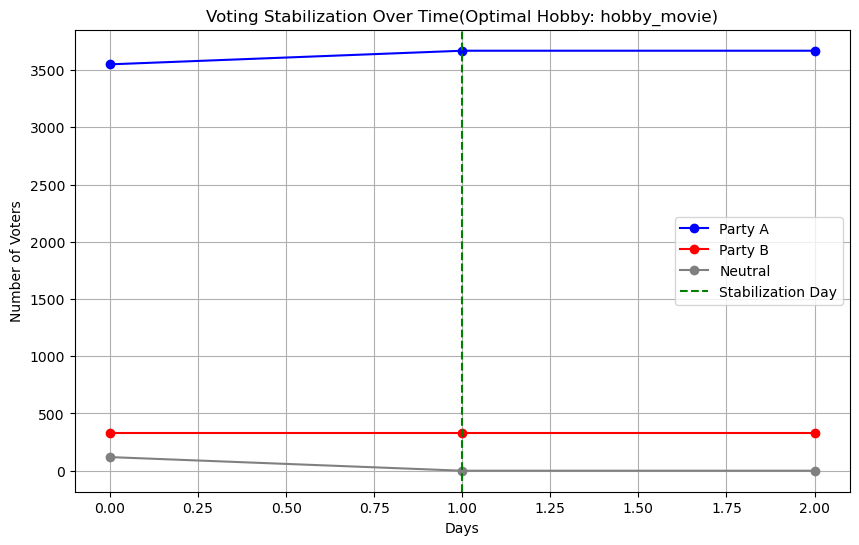

In [22]:
days, votes_A, votes_B, votes_neutral = zip(*best_history)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(days, votes_A, marker='o', label='Party A', color='blue')
plt.plot(days, votes_B, marker='o', label='Party B', color='red')
plt.plot(days, votes_neutral, marker='o', label='Neutral', color='grey')

plt.axvline(x=days[-2], color='green', linestyle='--', linewidth=1.5, label='Stabilization Day')

plt.xlabel('Days')
plt.ylabel('Number of Voters')
plt.title(f'Voting Stabilization Over Time(Optimal Hobby: {best_result["hobby"]})')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import numpy as np
import networkx as nx

G = nx.Graph()
for voter, friends in adjacency.items():
    for friend in friends:
        G.add_edge(voter, friend)

voters = sorted(G.nodes())
A = nx.to_numpy_array(G, nodelist=voters)

print("Adjacency Matrix shape:", A.shape)

Adjacency Matrix shape: (4000, 4000)


In [27]:
#L = D-A
degree_vals = np.sum(A, axis=1)
D = np.diag(degree_vals)

L = D - A

print("Laplacian Matrix shape:", L.shape)

Laplacian Matrix shape: (4000, 4000)


In [29]:
# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(L)

print("Eigenvalues:", eigenvalues[:5])  

Eigenvalues: [-3.23860572e-14  2.96469494e+00  3.72287455e+00  3.89501298e+00
  3.90447613e+00]


In [30]:
# k=3 steps -> stablization
k = 3

# influence matrix 
L_power_k = eigenvectors @ np.diag(eigenvalues**k) @ eigenvectors.T

# sum influence
influence_scores = np.sum(np.abs(L_power_k), axis=1)

top_influential_indices = np.argsort(influence_scores)[::-1][:10]

print("Top 10 influential voters:")
for idx in top_influential_indices:
    voter_id = voters[idx]
    print(f"Voter {voter_id}: Influence Score = {influence_scores[idx]:.4f}")

Top 10 influential voters:
Voter 3897: Influence Score = 31790750.0000
Voter 578: Influence Score = 29510892.0000
Voter 2309: Influence Score = 27888650.0000
Voter 947: Influence Score = 27431194.0000
Voter 3700: Influence Score = 26847498.0000
Voter 2466: Influence Score = 26732816.0000
Voter 810: Influence Score = 26452476.0000
Voter 3586: Influence Score = 26431612.0000
Voter 3896: Influence Score = 26368918.0000
Voter 3474: Influence Score = 26342196.0000
